In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
### Importing the California price dataset
data = sklearn.datasets.fetch_california_housing()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [3]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Price'] = data.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
df.shape

(20640, 9)

In [5]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
Price,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


<h6> Understanding the correlation between various features in the dataset

<Axes: >

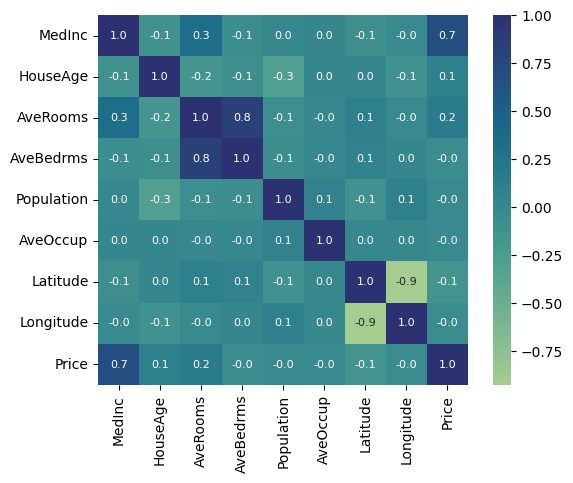

In [7]:
correlation = df.corr()
plt.figure.Figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='crest')

<h5> Spliting the data

In [8]:
X = df.drop('Price', axis=1)
y = df.Price

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 2023)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Using XGBoost

<h4> Model training

In [11]:
model = XGBRegressor().fit(X_train, Y_train)

<h5> Evaluation 

In [12]:
train_pred =  model.predict(X_train)

In [13]:
print('r squared error: ',metrics.r2_score(Y_train, train_pred))
print('mean absolute error: ',metrics.mean_absolute_error(Y_train, train_pred))

r squared error:  0.9453906063315605
mean absolute error:  0.18932742766637184


In [14]:
test_pred =  model.predict(X_test)

In [15]:
print('r squared error: ',metrics.r2_score(Y_test, test_pred))
print('mean absolute error: ',metrics.mean_absolute_error(Y_test, test_pred))

r squared error:  0.8348604922978908
mean absolute error:  0.3117575900818303


### Using tensorflow

In [16]:
import tensorflow as tf
import keras
from keras import layers

In [17]:
X_train = tf.convert_to_tensor(X_train)
Y_train = tf.convert_to_tensor(Y_train)

X_test = tf.convert_to_tensor(X_test)
Y_test = tf.convert_to_tensor(Y_test)

In [18]:
# Create a model that include the normalization layer
inputs = keras.Input(shape=8)
x = layers.Dense(500, activation="relu")(inputs)
x = layers.Dense(100, activation="relu")(x)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)


model.compile(optimizer = 'adam',
             loss = 'mae')
model.fit(X_train, Y_train, epochs=50)

Epoch 1/50
516/516 [==============================] - 2s 2ms/step - loss: 0.4978
Epoch 2/50
516/516 [==============================] - 1s 2ms/step - loss: 0.4182
Epoch 3/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3951
Epoch 4/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3796
Epoch 5/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3694
Epoch 6/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3651
Epoch 7/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3605
Epoch 8/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3539
Epoch 9/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3496
Epoch 10/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3484
Epoch 11/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3442
Epoch 12/50
516/516 [==============================] - 1s 2ms/step - loss: 0.3415
Epoch 13/50
516/516 [====

In [19]:
model.evaluate(X_test, Y_test)

129/129 [==============================] - 0s 1ms/step - loss: 0.3298


0.32983696460723877